# 20.1. Data Enrichment - Integrated Dataset - Malware Prediction
Predict the malware class and maliciousness from the Threat Vendor Analysis


In [1]:
from datetime import datetime
import os
import time
import pandas as pd 
import requests
import urllib3
import json
import sys
import math

import numpy as np

In [2]:
alias       = r'C:\\Users\\leona\\OneDrive\\Desktop\\Tesi\\Pipeline\\Datasets\\Pipeline\\IocSegnalations\\IntegratedDataset\\PostDataEnrichment\\Alias.csv'
malwares    = r'C:\\Users\\leona\\OneDrive\\Desktop\\Tesi\\Pipeline\\Datasets\\Pipeline\\IocSegnalations\\IntegratedDataset\\PostDataEnrichment\\Malwares.csv'
entries     = r'C:\\Users\\leona\\OneDrive\\Desktop\\Tesi\\Pipeline\\Datasets\\Pipeline\\FileAnalysis\\PostDataEnrichment\\Step1\\Entries.csv'
tv_analysis = r'C:\\Users\\leona\\OneDrive\\Desktop\\Tesi\\Pipeline\\Datasets\\Pipeline\\FileAnalysis\\PostDataCleaning\\Integrated_Dataset\\TV_Analysis.csv'


## Enrichment Malware

Select a malware or an alias from the list of malwares table which is the most similiar to the malware assigned by the Threat Vendor

#### Entries 

In [3]:
entries_df = pd.read_csv(entries, low_memory = False)
colonna_da_eliminare = ['Unnamed: 0', 'first_seen', 'last_seen']
entries_df = entries_df.drop(colonna_da_eliminare, axis=1)
entries_df

,sha1,sha256,md5,analysis_date,file_type,delivery_method
0,411535c9548f86034a6a9a603de521a86a3b5466,04c53261b1220a894a02f5ffb39cdfd73f93481c0b5c81...,5b5a0225a2b7b9a054417662c733168a,2021-11-09,exe,email attachment
1,1ad9e9761fd6935c0cf5048c9615d0383baac48e,ac901bf5882f14e9e07235b8488b6479b4519addda6dbf...,da9534900ee0d11c9b30cf33152ea03c,2023-07-19,exe,web download
2,8ab63abfe58fb218cc001581ac0d9fe38c784157,7f514ed5e1ec262953e6252a4089531c519e95d700c580...,855232a26e8afcd0cca5f816a1919dee,2022-01-04,exe,unknown
3,55cbf8dae95d350ad7e5a63b418f6cd203488f51,8b7ae9f195b075a789d6d8277d500d27754bfa3c53ecca...,97d9d216f2627cb238ca6637580b1739,2022-02-09,exe,unknown
4,a2915c1be9e6134b7bf3ca5ca00eeb0c969bedab,6c2a2251861a6d2701814843fadac940cf4d34db9f446f...,1b09de36dfe5850d7e3fbd6b39c89a43,2021-02-11,exe,web download
...,...,...,...,...,...,...
2657,6b6955af591154d3f6e2db35ca9904cce7e264b1,3a9d8c693b7dc6a9c2bf876c5626ebd0923e35bd5f698b...,03872a722df0b073a84fd1aa45eb9376,2020-02-20,elf,unknown
2658,3ab53037e2360c42b57d213234ced58717844a71,5de4932cb0ccab3fec711135cdd1af5a09c26a870bfb2d...,e0fea510c784eb0e440e99e53d83d414,2021-07-14,exe,unknown
2659,4f9b9859a596a8bfdfee516788587ca0c0fb6ae8,f10dd5ce32d72489dd2696e5b58ee115f3cd065969a61a...,c9f771be253b6ca1d7a808d7d65c5e29,2020-09-08,exe,unknown
2660,d14540087dd6d350fb49e644e53ccefc0e4c1582,dba8a4717d516772b8cc06bd258265f21f7db6ddab6232...,fe783ff4bccd76cb215ee1f7738d9ed5,2021-12-20,exe,unknown


In [4]:
file_types = entries_df.file_type.unique()
file_types

array(['exe', 'elf', 'apk', 'sh', 'dll', 'js', 'xls', 'lnk', 'jar', 'doc',
       'unknown', 'rtf', 'vbs', 'xlsm', 'ooxml', 'android', 'ps', 'msi',
       'cdf', 'hta', 'bat', 'pdf'], dtype=object)

#### Alias 

In [5]:
alias_df = pd.read_csv(alias, low_memory = False)
alias_df

,malware,alias
0,cobalt strike,agentemis
1,nanocore rat,nancrat
2,remcos,remcosrat
3,loki password stealer pws,burkina
4,dcrat,darkcrystal rat
...,...,...
284,redline stealer,power line datacenter
285,cobalt strike,contabo
286,agent tesla,tango telindus
287,gootloader,google cloud platform


In [6]:
words_list = list(set(list(alias_df[alias_df['alias'].notna()]['alias'])))
len(words_list)


288

#### Malwares from Threat Vendor Analysis

In [7]:
tv_analysis_df = pd.read_csv(tv_analysis, low_memory = False)
tv_analysis_df

,sha1,sha256,md5,malware,verdict,threat_vendor_name
0,411535c9548f86034a6a9a603de521a86a3b5466,04c53261b1220a894a02f5ffb39cdfd73f93481c0b5c81...,5b5a0225a2b7b9a054417662c733168a,pua.win.packer.borlanddelphi-15,NaN,clamav
1,1ad9e9761fd6935c0cf5048c9615d0383baac48e,ac901bf5882f14e9e07235b8488b6479b4519addda6dbf...,da9534900ee0d11c9b30cf33152ea03c,securiteinfo.com.trojan.generickd.68242337.204...,NaN,clamav
2,8ab63abfe58fb218cc001581ac0d9fe38c784157,7f514ed5e1ec262953e6252a4089531c519e95d700c580...,855232a26e8afcd0cca5f816a1919dee,win.trojan.remcos-9753190-0,NaN,clamav
3,8ab63abfe58fb218cc001581ac0d9fe38c784157,7f514ed5e1ec262953e6252a4089531c519e95d700c580...,855232a26e8afcd0cca5f816a1919dee,win.trojan.remcos-9841897-0,NaN,clamav
4,a2915c1be9e6134b7bf3ca5ca00eeb0c969bedab,6c2a2251861a6d2701814843fadac940cf4d34db9f446f...,1b09de36dfe5850d7e3fbd6b39c89a43,securiteinfo.com.generic.mg.1b09de36dfe5850d.2...,NaN,clamav
...,...,...,...,...,...,...
9708,0d7b506cdc8e0228a8c50f1adf3b1b3224fc114d,a48ab00c2a748d146264d9ceebed2346013a730bde2ee9...,1e53278bd1d1ee7c84ffc2d44dce4117,win.packed.zusy-6860439-0,malicious,clamav
9709,a3447ba9b83f30284c6d3effb45c31ad9d5f258f,bbd3ecd9e9671d94e8897980c4eb9391ae9cb444615ed9...,f6eec1317ece3ffb7c4916e224d9734d,win.trojan.revengerat-6344273-0,malicious,clamav
9710,3ab53037e2360c42b57d213234ced58717844a71,5de4932cb0ccab3fec711135cdd1af5a09c26a870bfb2d...,e0fea510c784eb0e440e99e53d83d414,win.malware.generic-6623004-0,malicious,clamav
9711,4f9b9859a596a8bfdfee516788587ca0c0fb6ae8,f10dd5ce32d72489dd2696e5b58ee115f3cd065969a61a...,c9f771be253b6ca1d7a808d7d65c5e29,win.malware.dlmc-7395626-0,malicious,clamav


In [8]:
tv_analysis_df[['sha1', 'sha256', 'md5']].nunique()

sha1      2458
sha256    2458
md5       2458
dtype: int64

In [9]:
tv_analysis_df_new = tv_analysis_df.copy()

tv_analysis_df_new['worm'] = 0
tv_analysis_df_new['trojan'] = 0
tv_analysis_df_new['ransomware'] = 0
tv_analysis_df_new['rootkit'] = 0
tv_analysis_df_new['spyware'] = 0
tv_analysis_df_new['adware'] = 0
tv_analysis_df_new['botnet'] = 0
tv_analysis_df_new['keylogger'] = 0
tv_analysis_df_new['dropper'] = 0
tv_analysis_df_new['backdoor'] = 0
tv_analysis_df_new['downloader'] = 0

worm_keys       = ['worm', 'w0rm', 'slam']
trojan_keys     = ['rat', 'trj', 'trojan', ]
ransomware_keys = ['ransom', 'crypt', 'lock', 'ransomware']
keylog_keys     = ['key', 'keylog', ]
adware_keys     = ['adw', 'adware']
rootkit_keys    = ['root', 'kit']
botnet_keys     = ['bot', 'c2', 'cc', 'net']
spyware_keys    = ['spy', 'steal']
backdoor_keys   = ['bd', 'back', 'door']
download_keys   = ['down', 'dl', 'load']
dropper_keys    = ['drop', 'drp', 'dropper']


def verifica_presenza(parole_chiave, stringa):
    for parola_chiave in parole_chiave:
        if parola_chiave.lower() in stringa.lower():
            return True
    return False

for i in range(len(tv_analysis_df_new)):
    
    tag_name = tv_analysis_df_new.at[i, 'malware']
    
    if(pd.notna(tag_name)):
    
        if verifica_presenza(worm_keys, tag_name):
            tv_analysis_df_new.loc[i, 'worm'] = 1

        if verifica_presenza(trojan_keys, tag_name):
            tv_analysis_df_new.loc[i, 'trojan'] = 1  

        if verifica_presenza(ransomware_keys, tag_name):
            tv_analysis_df_new.loc[i, 'ransomware'] = 1

        if verifica_presenza(rootkit_keys, tag_name):
            tv_analysis_df_new.loc[i, 'rootkit'] = 1

        if verifica_presenza(spyware_keys, tag_name):
            tv_analysis_df_new.loc[i, 'spyware'] = 1  

        if verifica_presenza(adware_keys, tag_name):
            tv_analysis_df_new.loc[i, 'adware'] = 1

        if verifica_presenza(botnet_keys, tag_name):
            tv_analysis_df_new.loc[i, 'botnet'] = 1

        if verifica_presenza(keylog_keys, tag_name):
            tv_analysis_df_new.loc[i, 'keylogger'] = 1    

        if verifica_presenza(dropper_keys, tag_name):
            tv_analysis_df_new.loc[i, 'dropper'] = 1    

        if verifica_presenza(backdoor_keys, tag_name):
            tv_analysis_df_new.loc[i, 'backdoor'] = 1   

        if verifica_presenza(download_keys, tag_name):
            tv_analysis_df_new.loc[i, 'downloader'] = 1 
        
tv_analysis_df_new       


,sha1,sha256,md5,malware,verdict,threat_vendor_name,worm,trojan,ransomware,rootkit,spyware,adware,botnet,keylogger,dropper,backdoor,downloader
0,411535c9548f86034a6a9a603de521a86a3b5466,04c53261b1220a894a02f5ffb39cdfd73f93481c0b5c81...,5b5a0225a2b7b9a054417662c733168a,pua.win.packer.borlanddelphi-15,NaN,clamav,0,0,0,0,0,0,0,0,0,0,0
1,1ad9e9761fd6935c0cf5048c9615d0383baac48e,ac901bf5882f14e9e07235b8488b6479b4519addda6dbf...,da9534900ee0d11c9b30cf33152ea03c,securiteinfo.com.trojan.generickd.68242337.204...,NaN,clamav,0,1,0,0,0,0,0,0,0,0,0
2,8ab63abfe58fb218cc001581ac0d9fe38c784157,7f514ed5e1ec262953e6252a4089531c519e95d700c580...,855232a26e8afcd0cca5f816a1919dee,win.trojan.remcos-9753190-0,NaN,clamav,0,1,0,0,0,0,0,0,0,0,0
3,8ab63abfe58fb218cc001581ac0d9fe38c784157,7f514ed5e1ec262953e6252a4089531c519e95d700c580...,855232a26e8afcd0cca5f816a1919dee,win.trojan.remcos-9841897-0,NaN,clamav,0,1,0,0,0,0,0,0,0,0,0
4,a2915c1be9e6134b7bf3ca5ca00eeb0c969bedab,6c2a2251861a6d2701814843fadac940cf4d34db9f446f...,1b09de36dfe5850d7e3fbd6b39c89a43,securiteinfo.com.generic.mg.1b09de36dfe5850d.2...,NaN,clamav,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9708,0d7b506cdc8e0228a8c50f1adf3b1b3224fc114d,a48ab00c2a748d146264d9ceebed2346013a730bde2ee9...,1e53278bd1d1ee7c84ffc2d44dce4117,win.packed.zusy-6860439-0,malicious,clamav,0,0,0,0,0,0,0,0,0,0,0
9709,a3447ba9b83f30284c6d3effb45c31ad9d5f258f,bbd3ecd9e9671d94e8897980c4eb9391ae9cb444615ed9...,f6eec1317ece3ffb7c4916e224d9734d,win.trojan.revengerat-6344273-0,malicious,clamav,0,1,0,0,0,0,0,0,0,0,0
9710,3ab53037e2360c42b57d213234ced58717844a71,5de4932cb0ccab3fec711135cdd1af5a09c26a870bfb2d...,e0fea510c784eb0e440e99e53d83d414,win.malware.generic-6623004-0,malicious,clamav,0,0,0,0,0,0,0,0,0,0,0
9711,4f9b9859a596a8bfdfee516788587ca0c0fb6ae8,f10dd5ce32d72489dd2696e5b58ee115f3cd065969a61a...,c9f771be253b6ca1d7a808d7d65c5e29,win.malware.dlmc-7395626-0,malicious,clamav,0,0,0,0,0,0,0,0,0,0,1


In [10]:
tv_analysis_df_new[tv_analysis_df_new.sha1 == '007416f9ba10d2e2951a9dcd104b7206ad20d433' ]

,sha1,sha256,md5,malware,verdict,threat_vendor_name,worm,trojan,ransomware,rootkit,spyware,adware,botnet,keylogger,dropper,backdoor,downloader
7415,007416f9ba10d2e2951a9dcd104b7206ad20d433,094b57a07096fb1f866a104c0b14c84aa99815b6135877...,7baa4836bd81113c16960501f679a81b,NaN,malicious,adobe malware classifier,0,0,0,0,0,0,0,0,0,0,0
8925,007416f9ba10d2e2951a9dcd104b7206ad20d433,094b57a07096fb1f866a104c0b14c84aa99815b6135877...,7baa4836bd81113c16960501f679a81b,win.packed.razy-9625918-0,malicious,clamav,0,0,0,0,0,0,0,0,0,0,0


In [11]:
from collections import Counter

def most_common_value(group):
    value_counts = Counter(group)
    most_common = max(value_counts, key=value_counts.get)
    return most_common

new = tv_analysis_df_new.dropna(subset=['verdict'])

new = pd.DataFrame(new.groupby(['sha1', 'sha256', 'md5'])['verdict'].agg(most_common_value).reset_index())

new

,sha1,sha256,md5,verdict
0,007416f9ba10d2e2951a9dcd104b7206ad20d433,094b57a07096fb1f866a104c0b14c84aa99815b6135877...,7baa4836bd81113c16960501f679a81b,malicious
1,0076d8c6a11389be49538c5ad7b7d785267d610b,a536dd3a57671b050f8928a41d84eaecb4424055e3fa62...,8c92da8deae966909acff4f1703f3707,malicious
2,008f97da0165cb969cf5fd1eca915272be7d3ead,5fbae0ffc5fc830f591197bd52b2523ca7cb51e6fcc41d...,a9ec10648f84a04baeb42bfff166ac62,malicious
3,00deee1467fdb3da4538b92e11702938700c3c18,099562ce3bc1287853f17b20de1a32f043f600a20c430d...,08df5b6cfb6640881ec9bf5064739842,malicious
4,010235d7e9862a99bebfbe6356fa2a1314a60ce5,e276038d763f4304792e616270cd17e327a9cec96911d7...,aa3174796d63fcb60c4ab4a1868bb77c,malicious
...,...,...,...,...
2453,ff91376da89e90d19e7c9f53dd8915be22e83627,d9dcaa71fb3a6eb36123628d089cfa59f1b3f01120626a...,31b76b0b5ab72c603ef54efa63c32b22,malicious
2454,ff945fbb4577b5b8939d6f80367c5e4b6cdef99b,bf9c7574e3ca23a96e317b42385aee11a982ab20649a69...,87243804ebf481b95392b3ec64774297,malicious
2455,ffa389bca10a6cc2ce21599a88fb46c1fe74ddae,498bb8801504768164f19943b448561cc59627fccb169a...,ebf038addbae83d5a577c3e0a9bb40d2,malicious
2456,fff8c580c32587b64b62794c35f22ecfe4787ac3,81e2da0121fbcfa18b7bd6ac1b587bf4b36aef52185835...,695ec9e465a43e9f64f1a5926325948c,malicious


In [12]:
from collections import Counter

grouped_df = tv_analysis_df_new[['sha1', 'sha256', 'md5', 'worm', 'trojan', 'ransomware', 'rootkit',
       'spyware', 'adware', 'botnet', 'keylogger', 'dropper', 'backdoor',
       'downloader']].groupby(['sha1', 'sha256', 'md5']).sum()
max_column = grouped_df.idxmax(axis=1)

max_is_unique = grouped_df.eq(grouped_df.max(axis=1), axis=0).sum(axis=1) == 1

max_column[ grouped_df.sum(axis=1) == 0 ] = 'unknown'

condition = max_is_unique & grouped_df.sum(axis=1) != 0
random_column = np.random.choice(grouped_df.columns, size=np.sum(condition), replace=True)

max_column[condition] = random_column

type_df = pd.DataFrame(max_column).reset_index()
type_df = type_df.rename(columns={0: 'malware_type'})


#max_column[ grouped_df.sum(axis=1) == 0 & max_is_unique ] = 'unknown'


#type_df = pd.DataFrame(max_column).reset_index()
#type_df = type_df.rename(columns={0 : 'malware_type'})

type_df 

,sha1,sha256,md5,malware_type
0,007416f9ba10d2e2951a9dcd104b7206ad20d433,094b57a07096fb1f866a104c0b14c84aa99815b6135877...,7baa4836bd81113c16960501f679a81b,unknown
1,0076d8c6a11389be49538c5ad7b7d785267d610b,a536dd3a57671b050f8928a41d84eaecb4424055e3fa62...,8c92da8deae966909acff4f1703f3707,unknown
2,008f97da0165cb969cf5fd1eca915272be7d3ead,5fbae0ffc5fc830f591197bd52b2523ca7cb51e6fcc41d...,a9ec10648f84a04baeb42bfff166ac62,trojan
3,00deee1467fdb3da4538b92e11702938700c3c18,099562ce3bc1287853f17b20de1a32f043f600a20c430d...,08df5b6cfb6640881ec9bf5064739842,unknown
4,010235d7e9862a99bebfbe6356fa2a1314a60ce5,e276038d763f4304792e616270cd17e327a9cec96911d7...,aa3174796d63fcb60c4ab4a1868bb77c,trojan
...,...,...,...,...
2453,ff91376da89e90d19e7c9f53dd8915be22e83627,d9dcaa71fb3a6eb36123628d089cfa59f1b3f01120626a...,31b76b0b5ab72c603ef54efa63c32b22,trojan
2454,ff945fbb4577b5b8939d6f80367c5e4b6cdef99b,bf9c7574e3ca23a96e317b42385aee11a982ab20649a69...,87243804ebf481b95392b3ec64774297,unknown
2455,ffa389bca10a6cc2ce21599a88fb46c1fe74ddae,498bb8801504768164f19943b448561cc59627fccb169a...,ebf038addbae83d5a577c3e0a9bb40d2,trojan
2456,fff8c580c32587b64b62794c35f22ecfe4787ac3,81e2da0121fbcfa18b7bd6ac1b587bf4b36aef52185835...,695ec9e465a43e9f64f1a5926325948c,backdoor


In [13]:
type_df.malware_type.value_counts()

malware_type
trojan        825
unknown       505
dropper       133
downloader    125
worm          124
spyware       122
rootkit       117
backdoor      112
botnet        102
keylogger     101
adware        100
ransomware     92
Name: count, dtype: int64

In [14]:
merged_df = pd.merge(new, type_df, on=['sha1', 'sha256', 'md5'], how = 'outer')
merged_df

,sha1,sha256,md5,verdict,malware_type
0,007416f9ba10d2e2951a9dcd104b7206ad20d433,094b57a07096fb1f866a104c0b14c84aa99815b6135877...,7baa4836bd81113c16960501f679a81b,malicious,unknown
1,0076d8c6a11389be49538c5ad7b7d785267d610b,a536dd3a57671b050f8928a41d84eaecb4424055e3fa62...,8c92da8deae966909acff4f1703f3707,malicious,unknown
2,008f97da0165cb969cf5fd1eca915272be7d3ead,5fbae0ffc5fc830f591197bd52b2523ca7cb51e6fcc41d...,a9ec10648f84a04baeb42bfff166ac62,malicious,trojan
3,00deee1467fdb3da4538b92e11702938700c3c18,099562ce3bc1287853f17b20de1a32f043f600a20c430d...,08df5b6cfb6640881ec9bf5064739842,malicious,unknown
4,010235d7e9862a99bebfbe6356fa2a1314a60ce5,e276038d763f4304792e616270cd17e327a9cec96911d7...,aa3174796d63fcb60c4ab4a1868bb77c,malicious,trojan
...,...,...,...,...,...
2453,ff91376da89e90d19e7c9f53dd8915be22e83627,d9dcaa71fb3a6eb36123628d089cfa59f1b3f01120626a...,31b76b0b5ab72c603ef54efa63c32b22,malicious,trojan
2454,ff945fbb4577b5b8939d6f80367c5e4b6cdef99b,bf9c7574e3ca23a96e317b42385aee11a982ab20649a69...,87243804ebf481b95392b3ec64774297,malicious,unknown
2455,ffa389bca10a6cc2ce21599a88fb46c1fe74ddae,498bb8801504768164f19943b448561cc59627fccb169a...,ebf038addbae83d5a577c3e0a9bb40d2,malicious,trojan
2456,fff8c580c32587b64b62794c35f22ecfe4787ac3,81e2da0121fbcfa18b7bd6ac1b587bf4b36aef52185835...,695ec9e465a43e9f64f1a5926325948c,malicious,backdoor


In [15]:
tv_analysis_df = tv_analysis_df.drop_duplicates().reset_index(drop = True)
tv_analysis_df

,sha1,sha256,md5,malware,verdict,threat_vendor_name
0,411535c9548f86034a6a9a603de521a86a3b5466,04c53261b1220a894a02f5ffb39cdfd73f93481c0b5c81...,5b5a0225a2b7b9a054417662c733168a,pua.win.packer.borlanddelphi-15,NaN,clamav
1,1ad9e9761fd6935c0cf5048c9615d0383baac48e,ac901bf5882f14e9e07235b8488b6479b4519addda6dbf...,da9534900ee0d11c9b30cf33152ea03c,securiteinfo.com.trojan.generickd.68242337.204...,NaN,clamav
2,8ab63abfe58fb218cc001581ac0d9fe38c784157,7f514ed5e1ec262953e6252a4089531c519e95d700c580...,855232a26e8afcd0cca5f816a1919dee,win.trojan.remcos-9753190-0,NaN,clamav
3,8ab63abfe58fb218cc001581ac0d9fe38c784157,7f514ed5e1ec262953e6252a4089531c519e95d700c580...,855232a26e8afcd0cca5f816a1919dee,win.trojan.remcos-9841897-0,NaN,clamav
4,a2915c1be9e6134b7bf3ca5ca00eeb0c969bedab,6c2a2251861a6d2701814843fadac940cf4d34db9f446f...,1b09de36dfe5850d7e3fbd6b39c89a43,securiteinfo.com.generic.mg.1b09de36dfe5850d.2...,NaN,clamav
...,...,...,...,...,...,...
9631,0d7b506cdc8e0228a8c50f1adf3b1b3224fc114d,a48ab00c2a748d146264d9ceebed2346013a730bde2ee9...,1e53278bd1d1ee7c84ffc2d44dce4117,win.packed.zusy-6860439-0,malicious,clamav
9632,a3447ba9b83f30284c6d3effb45c31ad9d5f258f,bbd3ecd9e9671d94e8897980c4eb9391ae9cb444615ed9...,f6eec1317ece3ffb7c4916e224d9734d,win.trojan.revengerat-6344273-0,malicious,clamav
9633,3ab53037e2360c42b57d213234ced58717844a71,5de4932cb0ccab3fec711135cdd1af5a09c26a870bfb2d...,e0fea510c784eb0e440e99e53d83d414,win.malware.generic-6623004-0,malicious,clamav
9634,4f9b9859a596a8bfdfee516788587ca0c0fb6ae8,f10dd5ce32d72489dd2696e5b58ee115f3cd065969a61a...,c9f771be253b6ca1d7a808d7d65c5e29,win.malware.dlmc-7395626-0,malicious,clamav


In [16]:
import re

def rimuovi_parola_con_prefisso(stringa):
    parole = stringa.split()
    parole_senza_prefisso = [parola for parola in parole if not parola.startswith('packe')]
    risultato = ' '.join(parole_senza_prefisso)
    return risultato

tv_analysis2_df = tv_analysis_df.copy()

for i in range(len(tv_analysis2_df)):
        
    value = tv_analysis2_df.at[i,'malware']
    if (not isinstance(value, float) or not math.isnan(value)):    
        value = value.strip() 
        value = value.lower()
        value = value.replace(':', ' ').replace('.', ' ').replace('-', '').replace('\\', '').replace('[', '').replace(']', '').replace(',', '')
        value = value.strip() 
        value = ''.join(char for char in value if not char.isdigit())
        value = value.strip() 
        value = value.replace('linux', '').replace('unix', '').replace('win', '').replace('linux', '').replace('pua', '').replace('codel', '')
        value = value.replace('secure', '').replace('com', '').replace('securiteinfo','').replace('unofficial', '').replace('byte', '')
        value = value.replace('dropper ', '').replace('malware ', '').replace('backdoor ','').replace('trj', '').replace('trojan ', '').replace('keylogger ', '').replace('spyware ', '').replace('worm ', '')
        value = value.replace('sanesecurity', '')

        value = value.strip()

        for j in range(len(file_types)):
            
            file_type = file_types[j]
            value = value.replace(str(file_type), '')
            value = value.strip() 
            
        value = rimuovi_parola_con_prefisso(value).replace('codel', '')       
        value = value.strip() 

        tv_analysis2_df.at[i,'to_predict'] = value

In [17]:
tv_analysis2_df.head(50)

,sha1,sha256,md5,malware,verdict,threat_vendor_name,to_predict
0,411535c9548f86034a6a9a603de521a86a3b5466,04c53261b1220a894a02f5ffb39cdfd73f93481c0b5c81...,5b5a0225a2b7b9a054417662c733168a,pua.win.packer.borlanddelphi-15,NaN,clamav,borlanddelphi
1,1ad9e9761fd6935c0cf5048c9615d0383baac48e,ac901bf5882f14e9e07235b8488b6479b4519addda6dbf...,da9534900ee0d11c9b30cf33152ea03c,securiteinfo.com.trojan.generickd.68242337.204...,NaN,clamav,generickd
2,8ab63abfe58fb218cc001581ac0d9fe38c784157,7f514ed5e1ec262953e6252a4089531c519e95d700c580...,855232a26e8afcd0cca5f816a1919dee,win.trojan.remcos-9753190-0,NaN,clamav,remcos
3,8ab63abfe58fb218cc001581ac0d9fe38c784157,7f514ed5e1ec262953e6252a4089531c519e95d700c580...,855232a26e8afcd0cca5f816a1919dee,win.trojan.remcos-9841897-0,NaN,clamav,remcos
4,a2915c1be9e6134b7bf3ca5ca00eeb0c969bedab,6c2a2251861a6d2701814843fadac940cf4d34db9f446f...,1b09de36dfe5850d7e3fbd6b39c89a43,securiteinfo.com.generic.mg.1b09de36dfe5850d.2...,NaN,clamav,generic mg bdedfed
5,33379ca7a0e323155a8947fe2aca7ed361890478,848d2b13244077e886eb2d82de5811f8e6a3e8df67784a...,539b022dd96de4597e8b5af9ccdeff9c,win.dropper.detected-9941784-0,NaN,clamav,detected
6,33379ca7a0e323155a8947fe2aca7ed361890478,848d2b13244077e886eb2d82de5811f8e6a3e8df67784a...,539b022dd96de4597e8b5af9ccdeff9c,win.packed.njrat-7445143-0,NaN,clamav,njrat
7,4b5fc334afe2eb333f72fb7a7c84c81496c4ff1b,b5ca34b966549dfee1a824ab645c66b17217aadda4ccea...,fe7b14ca4f21d3a8e7dd188c25f347b7,pua.win.packer.protectsharewar-2,NaN,clamav,protectarewar
8,4b5fc334afe2eb333f72fb7a7c84c81496c4ff1b,b5ca34b966549dfee1a824ab645c66b17217aadda4ccea...,fe7b14ca4f21d3a8e7dd188c25f347b7,pua.win.packer.protectsharewar-3,NaN,clamav,protectarewar
9,75e83fa98776340a6f368ad0d83f227bc1d3534e,2c582e367b8d6ecee5eb359bef784f57dba139bcf71ce9...,e5e88148b2c1a3a702362367535dba31,pua.win.packer.upolyx-12,NaN,clamav,upolyx


In [18]:
tv_analysis_df.threat_vendor_name.unique()

array(['clamav', 'any.run', 'pl_mwdb', 'yoroi_yomi', 'intenzer',
       'inquest', 'cape', 'triage', 'filescan-io', 'vmray', 'avast',
       'adobe malware classifier'], dtype=object)

#### Jaro-Wrinkler Similarity index

In [19]:
# Jaro Winkler Similarity
def jaro_Winkler(s1, s2) :
 
    jaro_dist = jaro_distance(s1, s2);
 
    # If the jaro Similarity is above a threshold
    if (jaro_dist > 0.7) :
 
        # Find the length of common prefix
        prefix = 0;
 
        for i in range(min(len(s1), len(s2))) :
         
            # If the characters match
            if (s1[i] == s2[i]) :
                prefix += 1;
 
            # Else break
            else :
                break;
 
        # Maximum of 4 characters are allowed in prefix
        prefix = min(4, prefix);
 
        # Calculate jaro winkler Similarity
        jaro_dist += 0.1 * prefix * (1 - jaro_dist);
 
    return jaro_dist;


def jaro_distance(s1, s2) :
 
    # If the strings are equal
    if (s1 == s2) :
        return 1.0;
 
    # Length of two strings
    len1 = len(s1);
    len2 = len(s2);
 
    if (len1 == 0 or len2 == 0) :
        return 0.0;
 
    # Maximum distance upto which matching
    # is allowed
    max_dist = (max(len(s1), len(s2)) // 2 ) - 1;
 
    # Count of matches
    match = 0;
 
    # Hash for matches
    hash_s1 = [0] * len(s1) ;
    hash_s2 = [0] * len(s2) ;
 
    # Traverse through the first string
    for i in range(len1) :
 
        # Check if there is any matches
        for j in range( max(0, i - max_dist),
                    min(len2, i + max_dist + 1)) :
             
            # If there is a match
            if (s1[i] == s2[j] and hash_s2[j] == 0) :
                hash_s1[i] = 1;
                hash_s2[j] = 1;
                match += 1;
                break;
         
    # If there is no match
    if (match == 0) :
        return 0.0;
 
    # Number of transpositions
    t = 0;
 
    point = 0;
 
    # Count number of occurrences
    # where two characters match but
    # there is a third matched character
    # in between the indices
    for i in range(len1) :
        if (hash_s1[i]) :
 
            # Find the next matched character
            # in second string
            while (hash_s2[point] == 0) :
                point += 1;
 
            if (s1[i] != s2[point]) :
                point += 1;
                t += 1;
            else :
                point += 1;
                 
        t /= 2;
 
    # Return the Jaro Similarity
    return ((match / len1 + match / len2 +
            (match - t) / match ) / 3.0);

In [20]:
def compute_matrix(lista_riga, lista_colonna):
    
    df = pd.DataFrame()
    
    df.index = lista_riga
    
    df.rename(columns=lista_colonna, inplace=True)  
    
    for i in range(len(lista_riga)):
        for j in range(len(lista_colonna)):
            
            string1 = lista_riga[i]
            string2 = lista_colonna[j]
            
            jaro_wrinkler = jaro_Winkler(string1,string2)
            
            df.loc[string1, string2] = jaro_wrinkler
            
    return df
            
            

In [21]:
def check_similarity(df, words_list):
    
    dataframe = pd.DataFrame()
    
    for i in range(len(df)):
                
        mal = str(df.at[i, 'to_predict'])
        
        malwares_list = mal.split()
        matrix = compute_matrix( malwares_list, words_list)
        
        malwares_df = search_similiar_malware(matrix, mal,  0.85)
        
        dataframe = pd.concat([malwares_df, dataframe])
        
    return dataframe

In [22]:
def add_similarity_group(matrix, alpha):
    
    dataframe = pd.DataFrame()
    dataframe['malware'] = ''
    dataframe['group'] = ''
    indexes = list(matrix.index)
    columns = list(matrix.columns)
    
    count = 0
    
    for i in range(len(indexes)):
                
        temp = pd.DataFrame()

        for j in range(len(columns)):
            
            if(i > j):
                
                #print(f'( {i} , {j} )')
            
                x = indexes[i]
                y = columns[j]

                element = matrix.at[x, y]

                #print(f'maximum : {maximum}, element : { element } , x : { x } , y : { y }')

                if isinstance(element, float) and (element > alpha) :

                    if(not x in list(dataframe.malware)) and (not y in list(dataframe.malware)):
                        
                        data_x = {'malware': [x], 'group': [count]}
                        data_y = {'malware': [y], 'group': [count]}
                        temp_x = pd.DataFrame(data_x)
                        temp_y = pd.DataFrame(data_y)

                        count = count + 1

                        dataframe = pd.concat([dataframe, temp_x, temp_y], ignore_index= True)

                    elif (not x in list(dataframe.malware)) and (y in list(dataframe.malware)):

                        group = list(dataframe[dataframe.malware == y]['group'])[0]
                        data_x = {'malware': [x], 'group': [group]}
                        temp_x = pd.DataFrame(data_x)

                        dataframe = pd.concat([dataframe, temp_x], ignore_index= True)

                    elif ( x in list(dataframe.malware)) and (not y in list(dataframe.malware)):

                        group = list(dataframe[dataframe.malware == x]['group'])[0]
                        data_y = {'malware': [y], 'group': [group]}
                        temp_y = pd.DataFrame(data_y)

                        dataframe = pd.concat([dataframe, temp_y], ignore_index= True)

                    elif ( x in list(dataframe.malware)) and ( y in list(dataframe.malware)):

                        group_x = list(dataframe[dataframe.malware == x]['malware'])[0] 
                        group_y = list(dataframe[dataframe.malware == y]['malware'])[0] 

                        if ( group_x != group_y ):

                            group_max =   max( group_x, group_y )  
                            group_min =   min( group_x, group_y )

                            dataframe.loc[dataframe.group == group_min, 'group'] = group_max
                
            else:
                break
                            
            
    
    return dataframe

In [23]:
malwares_tv_lst = list(set(tv_analysis2_df['to_predict'].dropna().drop_duplicates()))
print(len(malwares_tv_lst))
malwares_tv_lst

695


['',
 'graybird',
 'smsthief',
 'artemisfdfeb',
 'muldrop',
 'variadic',
 'go',
 'dropperaacx drp',
 'apcalyerat',
 'limerat',
 'ransomnb',
 'artemisaab',
 'minggcc',
 'tasker',
 'nosrawec',
 'wrat',
 'miscreantpunch obfus',
 'perseus',
 'script sdrop',
 'downloader softdownloader',
 'embeddeddotnetbinary',
 'sllg',
 'pws siggen',
 'l genmaliciousoc',
 'scr malcodegdn',
 'farflibh',
 'crysan',
 'miraialc',
 'twave evil xrstrgood regsvr b',
 'gafgytks',
 'injuke',
 'lmamut',
 'raccoonstealer',
 'cobalt strike',
 'exploit',
 'lummastealer',
 'genautorunfile',
 'rednet',
 'sf wncryldra',
 'artemisebddfa',
 'downloader powerell',
 'adware slugin',
 'gafgyt',
 'drdl',
 'miraito',
 'pws banker',
 'borlanddelphi',
 'warzone',
 'cybergate',
 'fareitfzodeaba',
 'ave_maria',
 'l kryptik wza',
 'twave evil canciondelmariachi',
 'recordbreaker',
 'ransomware teslacrypt',
 'formbookremcos',
 'twave evil xrstrgood startbitstransfer',
 'redirect',
 'redline e',
 'lynx',
 'generickdz',
 'artemiscdbaa'

In [24]:
malwares_tv_matrix = compute_matrix(malwares_tv_lst, malwares_tv_lst)
malwares_tv_matrix

C:\Users\leona\AppData\Local\Temp\ipykernel_15720\2389614628.py:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df.loc[string1, string2] = jaro_wrinkler
C:\Users\leona\AppData\Local\Temp\ipykernel_15720\2389614628.py:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df.loc[string1, string2] = jaro_wrinkler
C:\Users\leona\AppData\Local\Temp\ipykernel_15720\2389614628.py:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider 

C:\Users\leona\AppData\Local\Temp\ipykernel_15720\2389614628.py:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df.loc[string1, string2] = jaro_wrinkler
C:\Users\leona\AppData\Local\Temp\ipykernel_15720\2389614628.py:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df.loc[string1, string2] = jaro_wrinkler
C:\Users\leona\AppData\Local\Temp\ipykernel_15720\2389614628.py:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider 

,,graybird,smsthief,artemisfdfeb,muldrop,variadic,go,dropperaacx drp,apcalyerat,limerat,...,miraibia,w aidetectnet,twave evil pkillpelldlanddetonatefoundationsofdecay,bv downloaderka drp,xmrig,decodens,diteken redline,fugrafa,generic mg cedbadfdac,malwarex
,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
graybird,0.0,1.000000,0.416667,0.609158,0.422619,0.664714,0.541667,0.566753,0.558333,0.511905,...,0.651042,0.535256,0.477941,0.501165,0.550000,0.416667,0.525000,0.601190,0.563492,0.500000
smsthief,0.0,0.416667,1.000000,0.733073,0.422619,0.416667,0.000000,0.397222,0.408333,0.569940,...,0.500000,0.490118,0.436275,0.392544,0.550000,0.416667,0.507639,0.422619,0.477307,0.500000
artemisfdfeb,0.0,0.611050,0.748752,1.000000,0.552091,0.611111,0.000000,0.483333,0.455556,0.784860,...,0.610074,0.649777,0.552266,0.413234,0.616178,0.583767,0.561784,0.559442,0.643294,0.610562
muldrop,0.0,0.422619,0.422619,0.537822,1.000000,0.480655,0.000000,0.612698,0.495238,0.614707,...,0.511905,0.406593,0.482245,0.554922,0.561905,0.511905,0.473016,0.523810,0.438182,0.601190
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
decodens,0.0,0.416667,0.416667,0.553819,0.511905,0.416667,0.541667,0.520660,0.483333,0.422619,...,0.000000,0.602564,0.549086,0.600219,0.000000,1.000000,0.623611,0.000000,0.590823,0.416667
diteken redline,0.0,0.525000,0.524980,0.581156,0.473016,0.588235,0.000000,0.554774,0.444444,0.612017,...,0.525000,0.715948,0.713447,0.606661,0.509799,0.650499,1.000000,0.403175,0.637513,0.459768
fugrafa,0.0,0.601190,0.422619,0.538690,0.523810,0.580357,0.547619,0.542857,0.513690,0.523810,...,0.601190,0.406593,0.441643,0.463659,0.546280,0.000000,0.403175,1.000000,0.523810,0.538690
generic mg cedbadfdac,0.0,0.563492,0.505939,0.679442,0.460296,0.563164,0.515873,0.560814,0.530155,0.587289,...,0.621023,0.665197,0.615834,0.623503,0.663482,0.620769,0.638092,0.523810,1.000000,0.505939


In [25]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import matplotlib.pyplot as plt

word_names = malwares_tv_matrix.columns

linkage_matrix = linkage(malwares_tv_matrix, method='complete')  



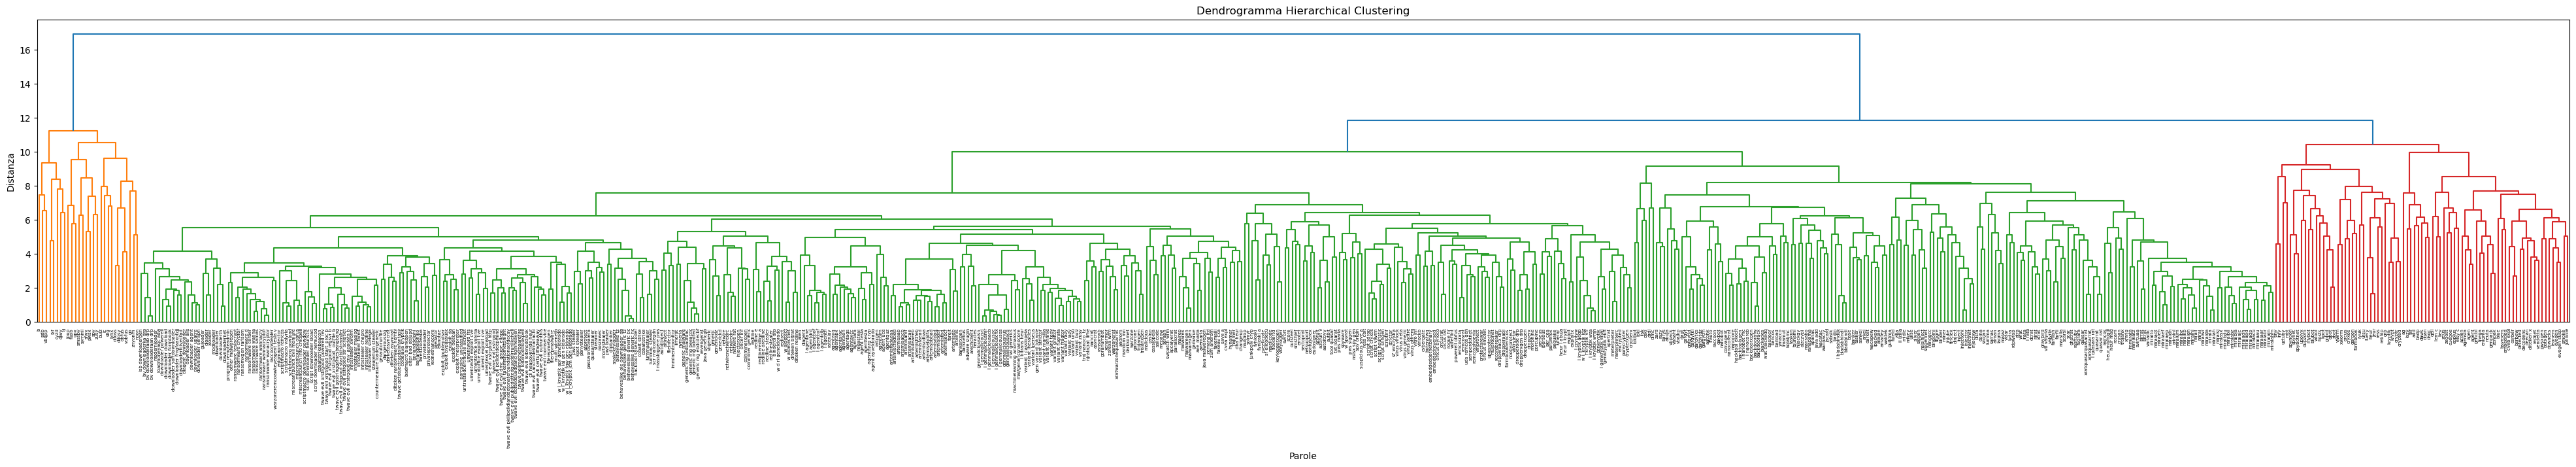

In [26]:
plt.figure(figsize=(50, 6))
dendrogram(linkage_matrix, labels=word_names, orientation='top', leaf_font_size=5)
plt.title('Dendrogramma Hierarchical Clustering')
plt.xlabel('Parole')
plt.ylabel('Distanza')
plt.show()

In [27]:
num_clusters = int(len(malwares_tv_lst)*0.75)  
clusters = fcluster(linkage_matrix, num_clusters, criterion='maxclust')

grouped_words = {}
for word, cluster_id in zip(word_names, clusters):
    if cluster_id not in grouped_words:
        grouped_words[cluster_id] = []
    grouped_words[cluster_id].append(word)

for cluster_id, words in grouped_words.items():
    print(f"Cluster {cluster_id}: {words}")

Cluster 4: ['']
Cluster 406: ['graybird']
Cluster 218: ['smsthief']
Cluster 149: ['artemisfdfeb', 'artemisaab', 'artemisebddfa', 'artemiscdbaa', 'artemisfbd', 'artemisbbbad', 'artemisebcf', 'artemisfaead', 'artemisdeaeeb', 'artemisafef', 'artemisacae', 'artemisddad', 'artemisdddf', 'artemisabcb']
Cluster 205: ['muldrop']
Cluster 441: ['variadic']
Cluster 28: ['go']
Cluster 268: ['dropperaacx drp', 'dropperaabl']
Cluster 187: ['apcalyerat']
Cluster 113: ['limerat']
Cluster 170: ['ransomnb']
Cluster 374: ['minggcc']
Cluster 352: ['tasker']
Cluster 96: ['nosrawec']
Cluster 397: ['wrat']
Cluster 47: ['miscreantpunch obfus', 'miscreantpunch evil monlure', 'miscreantpunch info cmdpell']
Cluster 278: ['perseus']
Cluster 237: ['script sdrop', 'script cryxos', 'script vjwrm']
Cluster 31: ['downloader softdownloader', 'downloader powerell', 'downloader fmgfaaxofzjj', 'downloader download', 'downloaderfcivecfad', 'downloader formbook']
Cluster 253: ['embeddeddotnetbinary']
Cluster 18: ['sllg']
Cl

In [33]:
len(grouped_words)

521

Elimina elementi del cluster se non c'è una similarity tra gli elementi 

In [28]:
cluster_similarity_matrices = {}
for cluster_id, cluster_elements in grouped_words.items():
    cluster_similarity_matrix = np.zeros((len(cluster_elements), len(cluster_elements)))
    for i, word1 in enumerate(cluster_elements):
        for j, word2 in enumerate(cluster_elements):

            similarity_score = jaro_Winkler(word1, word2)
            cluster_similarity_matrix[i][j] = similarity_score
    cluster_similarity_matrices[cluster_id] = cluster_similarity_matrix


for cluster_id, similarity_matrix in cluster_similarity_matrices.items():
    mean_similarity = np.mean(similarity_matrix, axis=1)  
    
    sorted_elements = [element for _, element in sorted(zip(mean_similarity, grouped_words[cluster_id]))]
    for i, element in enumerate(sorted_elements):

        similarities = [similarity_matrix[i][j] for j in range(len(sorted_elements))]

        num_similarities_above_threshold = sum(1 for sim in similarities if sim > 0.9)

        if num_similarities_above_threshold > len(sorted_elements) // 2:
            grouped_words[cluster_id] = sorted_elements[i:]
            break  


for cluster_id, words in grouped_words.items():
    print(f"Cluster {cluster_id}: {words}")


Cluster 4: ['']
Cluster 406: ['graybird']
Cluster 218: ['smsthief']
Cluster 149: ['artemisdddf', 'artemisbbbad', 'artemisacae', 'artemisddad', 'artemisabcb', 'artemisdeaeeb', 'artemisafef', 'artemisebcf', 'artemisfdfeb', 'artemisaab', 'artemiscdbaa', 'artemisfaead', 'artemisfbd', 'artemisebddfa']
Cluster 205: ['muldrop']
Cluster 441: ['variadic']
Cluster 28: ['go']
Cluster 268: ['dropperaacx drp', 'dropperaabl']
Cluster 187: ['apcalyerat']
Cluster 113: ['limerat']
Cluster 170: ['ransomnb']
Cluster 374: ['minggcc']
Cluster 352: ['tasker']
Cluster 96: ['nosrawec']
Cluster 397: ['wrat']
Cluster 47: ['miscreantpunch info cmdpell', 'miscreantpunch evil monlure']
Cluster 278: ['perseus']
Cluster 237: ['script vjwrm', 'script cryxos', 'script sdrop']
Cluster 31: ['downloader softdownloader', 'downloader powerell', 'downloader fmgfaaxofzjj', 'downloader download', 'downloaderfcivecfad', 'downloader formbook']
Cluster 253: ['embeddeddotnetbinary']
Cluster 18: ['sllg']
Cluster 233: ['pws siggen'

Unisci i clusters se possibile

In [46]:
import numpy as np

def compute_similarity_matrix(cluster1, cluster2):
    similarity_matrix = np.zeros((len(cluster2), len(cluster1)))
    for i, word1 in enumerate(cluster1):
        for j, word2 in enumerate(cluster2):
            similarity_score = jaro_Winkler(word1, word2)  
            similarity_matrix[j][i] = similarity_score  
    return similarity_matrix

def compute_similarity_mean(similarity_matrix):
    return np.mean(similarity_matrix)

def merge_clusters(cluster1, cluster2):
    return cluster1 + cluster2

clusters = list(grouped_words.values())

while True:
    merged = False
    max_similarity_mean = 0
    clusters_to_merge = None

    for i in range(len(clusters)):
        for j in range(i+1, len(clusters)):
            similarity_matrix = compute_similarity_matrix(clusters[i], clusters[j])
            similarity_mean = compute_similarity_mean(similarity_matrix)

            if similarity_mean > 0.85:
                if similarity_mean > max_similarity_mean:
                    max_similarity_mean = similarity_mean
                    clusters_to_merge = (i, j)

    if clusters_to_merge is None:
        break
        
    print(f"-> {clusters[clusters_to_merge[0]]} & {clusters[clusters_to_merge[1]]}")

    merged_cluster = merge_clusters(clusters[clusters_to_merge[0]], clusters[clusters_to_merge[1]])
    clusters.pop(max(clusters_to_merge))
    clusters.pop(min(clusters_to_merge))
    clusters.append(merged_cluster)
    merged = True

print("Final clusters:")
for cluster in clusters:
    print(cluster)


-> ['redlineredline a'] & ['redline aredline']
-> ['exploit'] & ['exploitx']
-> ['downloader'] & ['downloadernet', 'downloaderth']
-> ['agen'] & ['agent']
-> ['fynloski'] & ['fynloski a']
-> ['perseus'] & ['lperseus']
-> ['miraito'] & ['miraiaot']
-> ['inject'] & ['dinject']
-> ['farflibh'] & ['farfli']
-> ['gafgytks'] & ['gafgyt']
-> ['miraiwr', 'miraida', 'miraiah', 'miraia'] & ['mirai']
-> ['cveb expl'] & ['cvea expl']
-> ['generickd', 'generickdz'] & ['generic']
-> ['nanocorerat'] & ['nanocore']
-> ['obfus'] & ['vobfus']
-> ['kryptik'] & ['krypt']
-> ['injectorxgen'] & ['injector', 'injectorx']
-> ['muldrop'] & ['muldropnet']
-> ['gafgytkl', 'gafgytld'] & ['gafgytks', 'gafgyt']
-> ['siggen'] & ['siggennet']
-> ['scarsi'] & ['scar']
-> ['darkkomet'] & ['darket']
-> ['autoitbyv'] & ['autoit']
-> ['cryptr'] & ['crypterx', 'crypterxgen']
-> ['exploit da'] & ['exploit', 'exploitx']
-> ['quasar rat', 'quasarrat'] & ['quasar']
-> ['remcosrat', 'remcosrata'] & ['remcos']
-> ['encrypted'] &

-> ['warzone'] & ['warzonerat', 'xratwarzonequasarrat']
-> ['twave evil publicdottedquaddlrrunlikehell', 'twave evil pkillpelldlanddetonatefoundationsofdecay', 'twave evil dottedquaddancinginheaven'] & ['twave evil evil dmc_gauge_ellapp', 'twave evil takemehometonight', 'twave evil pelldetdeepmind']
-> ['agent uce', 'agentquz'] & ['agentayq', 'agentavcc', 'agentarac', 'agentags', 'agentafa', 'agentaon', 'agentapx', 'agentojm', 'agen', 'agent']
-> ['pws banker'] & ['pws stealer']
-> ['variant fugrafa', 'variant razy', 'variant johnnie', 'variant lazy', 'variant bulz', 'variant fragtor', 'variant tedy', 'variant ursu', 'variant zusy', 'variant graftor'] & ['variant lheracles', 'variant lperseus', 'variant strictor', 'variant marsilia', 'variant l cassiopeia']
-> ['alman'] & ['laqma']
-> ['sliver'] & ['liev']
-> ['sectoprat'] & ['score']
-> ['script vjwrm', 'script cryxos', 'script sdrop'] & ['scriptmacro valyria', 'scriptmacro powload', 'scriptmacro remcos']
-> ['darketasyncrat'] & ['dar

In [47]:
len(clusters)

388

In [48]:
type(clusters)

list

Controlla se gli elementi che non sono stati inseriti all'interno del cluster possono far parte di un cluster

In [49]:
def elements_not_in_list(list1, list2):
    return [element for element in list1 if element not in list2]

In [50]:
cluster_to_check = []

for sublist in clusters:
    cluster_to_check.extend(sublist)
    
len(cluster_to_check)

688

In [51]:
possible_new_inputs = elements_not_in_list(malwares_tv_lst, cluster_to_check)
print(len(malwares_tv_lst))
print(len(cluster_to_check))
print(len(possible_new_inputs))


695
688
7


In [52]:
possible_new_inputs

['miscreantpunch obfus',
 'redline e',
 'miraibji',
 'ransomxgen ransom',
 'infostealer xworm',
 'miraiabz',
 'miraibdu']

In [53]:
def compute_similarity_matrix(cluster, element_list):
    similarity_matrix = np.zeros((len(element_list), len(cluster)))
    for i, element1 in enumerate(element_list):
        for j, element2 in enumerate(cluster):
            similarity_score = jaro_Winkler(element1, element2)
            similarity_matrix[i][j] = similarity_score
    return similarity_matrix

def compute_similarity_mean(similarity_matrix):
    return np.mean(similarity_matrix)

def merge_clusters(cluster1, cluster2):
    return cluster1 + cluster2

element_list = possible_new_inputs

while True:
    merged = False
    max_similarity_mean = 0
    clusters_to_merge = None

    for i, cluster in enumerate(clusters):
        similarity_matrix = compute_similarity_matrix(cluster, element_list)
        similarity_mean = compute_similarity_mean(similarity_matrix)

        if similarity_mean > 0.85:
            if similarity_mean > max_similarity_mean:
                max_similarity_mean = similarity_mean
                clusters_to_merge = i

    if clusters_to_merge is None:
        break
        
    print(f"-> {clusters[clusters_to_merge]} & {element_list}")

    merged_cluster = merge_clusters(clusters[clusters_to_merge], element_list)
    clusters.pop(clusters_to_merge)
    clusters.append(merged_cluster)
    merged = True

print("Final clusters:")
for cluster in clusters:
    print(cluster)

Final clusters:
['']
['graybird']
['smsthief']
['go']
['apcalyerat']
['limerat']
['ransomnb']
['minggcc']
['nosrawec']
['wrat']
['miscreantpunch info cmdpell', 'miscreantpunch evil monlure']
['sllg']
['pws siggen']
['scr malcodegdn']
['crysan']
['injuke']
['lmamut']
['genautorunfile']
['sf wncryldra']
['adware slugin']
['drdl']
['borlanddelphi', 'borlanddelphiko']
['cybergate']
['ave_maria', 'avemaria']
['twave evil canciondelmariachi', 'twave evil outrunthis', 'twave evil certutilfadeaway', 'twave evil roomservice']
['recordbreaker']
['ransomware cerber', 'ransomware samas', 'ransomware teslacrypt', 'ransomware d', 'ransomware cryptor', 'ransomware wanna', 'ransomware wannacry', 'ransomware wanacryptor', 'ransomware wannacryptor']
['redirect']
['lynx']
['amadey']
['mansabo']
['revengerat']
['lazy']
['bulz']
['paralaxrat']
['cerber']
['buteratwq']
['blue']
['lisk']
['ranapama']
['base']
['dha heur']
['arechclient', 'heracles']
['xenarmor']
['l agentane', 'l agentdrd', 'l agentcib', 'l 

In [55]:
cluster_to_check = []

for sublist in clusters:
    cluster_to_check.extend(sublist)
    
len(cluster_to_check)

possible_new_inputs = elements_not_in_list(malwares_tv_lst, cluster_to_check)
print(len(malwares_tv_lst))
print(len(cluster_to_check))
print(len(possible_new_inputs))


695
688
7


In [67]:
malware_alias_df = pd.DataFrame(columns=['malware', 'alias'])
alias_counts = {}
for cluster_id, words in grouped_words.items():
    cluster_name = np.random.choice(words) 
    
    print(f"Cluster ID: {cluster_id} {words} -> {cluster_name}")
    
    row = pd.DataFrame([data])
    malware_alias_df = pd.concat([malware_alias_df, row])   
    
    for word in words:
        if cluster_name not in alias_counts:
            alias_counts[cluster_name] = 1
        else:
            alias_counts[cluster_name] += 1
        
        data1 = {'malware': cluster_name, 'alias': word}
        row1 = pd.DataFrame([data1])
        malware_alias_df = pd.concat([malware_alias_df, row1])
    
    tv_analysis2_df.loc[tv_analysis2_df['to_predict'].isin(words), 'malware_tag'] = cluster_name
    
tv_analysis2_df

Cluster ID: 4 [''] -> 
Cluster ID: 406 ['graybird'] -> graybird
Cluster ID: 218 ['smsthief'] -> smsthief
Cluster ID: 149 ['artemisdddf', 'artemisbbbad', 'artemisacae', 'artemisddad', 'artemisabcb', 'artemisdeaeeb', 'artemisafef', 'artemisebcf', 'artemisfdfeb', 'artemisaab', 'artemiscdbaa', 'artemisfaead', 'artemisfbd', 'artemisebddfa'] -> artemisbbbad
Cluster ID: 205 ['muldrop'] -> muldrop
Cluster ID: 441 ['variadic'] -> variadic
Cluster ID: 28 ['go'] -> go
Cluster ID: 268 ['dropperaacx drp', 'dropperaabl'] -> dropperaacx drp
Cluster ID: 187 ['apcalyerat'] -> apcalyerat
Cluster ID: 113 ['limerat'] -> limerat
Cluster ID: 170 ['ransomnb'] -> ransomnb
Cluster ID: 374 ['minggcc'] -> minggcc
Cluster ID: 352 ['tasker'] -> tasker
Cluster ID: 96 ['nosrawec'] -> nosrawec
Cluster ID: 397 ['wrat'] -> wrat
Cluster ID: 47 ['miscreantpunch info cmdpell', 'miscreantpunch evil monlure'] -> miscreantpunch evil monlure
Cluster ID: 278 ['perseus'] -> perseus
Cluster ID: 237 ['script vjwrm', 'script cryxo

Cluster ID: 486 ['qell'] -> qell
Cluster ID: 264 ['ortcut emotet'] -> ortcut emotet
Cluster ID: 353 ['sankei'] -> sankei
Cluster ID: 76 ['umentword frs'] -> umentword frs
Cluster ID: 367 ['midie'] -> midie
Cluster ID: 190 ['malwarex', 'malwaregen', 'malwarexgen'] -> malwaregen
Cluster ID: 275 ['dropperx', 'dropperxgen'] -> dropperxgen
Cluster ID: 189 ['swpatch wrm'] -> swpatch wrm
Cluster ID: 371 ['nsisinject'] -> nsisinject
Cluster ID: 343 ['apanas'] -> apanas
Cluster ID: 323 ['convagent'] -> convagent
Cluster ID: 296 ['purecrypter'] -> purecrypter
Cluster ID: 181 ['cassiopeia'] -> cassiopeia
Cluster ID: 456 ['kpot'] -> kpot
Cluster ID: 191 ['malrep'] -> malrep
Cluster ID: 336 ['kolabmc'] -> kolabmc
Cluster ID: 393 ['lumma'] -> lumma
Cluster ID: 507 ['cveb expl'] -> cveb expl
Cluster ID: 57 ['diteken asyncrat'] -> diteken asyncrat
Cluster ID: 147 ['ratxgen'] -> ratxgen
Cluster ID: 498 ['genpack'] -> genpack
Cluster ID: 24 ['obfus'] -> obfus
Cluster ID: 102 ['behaveslike tz'] -> behave

Cluster ID: 485 ['liev'] -> liev
Cluster ID: 458 ['wtool'] -> wtool
Cluster ID: 283 ['heur l krypt'] -> heur l krypt
Cluster ID: 211 ['msellcode'] -> msellcode
Cluster ID: 70 ['exploit bypassuac'] -> exploit bypassuac
Cluster ID: 491 ['zeus'] -> zeus
Cluster ID: 368 ['mikey'] -> mikey
Cluster ID: 200 ['cvea expl'] -> cvea expl
Cluster ID: 111 ['fileinfector'] -> fileinfector
Cluster ID: 431 ['miraieh', 'miraiaef', 'miraiaep'] -> miraiaef
Cluster ID: 120 ['generic'] -> generic
Cluster ID: 48 ['enigmaprotector'] -> enigmaprotector
Cluster ID: 75 ['untrustedcertificate aichost'] -> untrustedcertificate aichost
Cluster ID: 244 ['virus generic'] -> virus generic
Cluster ID: 339 ['tsunami'] -> tsunami
Cluster ID: 333 ['banload'] -> banload
Cluster ID: 383 ['dinject'] -> dinject
Cluster ID: 340 ['hijackgy'] -> hijackgy
Cluster ID: 176 ['darkkomet'] -> darkkomet
Cluster ID: 266 ['protectarewar'] -> protectarewar
Cluster ID: 151 ['fareit'] -> fareit
Cluster ID: 202 ['hajimer'] -> hajimer
Cluste

,sha1,sha256,md5,malware,verdict,threat_vendor_name,to_predict,malware_tag
0,411535c9548f86034a6a9a603de521a86a3b5466,04c53261b1220a894a02f5ffb39cdfd73f93481c0b5c81...,5b5a0225a2b7b9a054417662c733168a,pua.win.packer.borlanddelphi-15,NaN,clamav,borlanddelphi,borlanddelphiko
1,1ad9e9761fd6935c0cf5048c9615d0383baac48e,ac901bf5882f14e9e07235b8488b6479b4519addda6dbf...,da9534900ee0d11c9b30cf33152ea03c,securiteinfo.com.trojan.generickd.68242337.204...,NaN,clamav,generickd,generickd
2,8ab63abfe58fb218cc001581ac0d9fe38c784157,7f514ed5e1ec262953e6252a4089531c519e95d700c580...,855232a26e8afcd0cca5f816a1919dee,win.trojan.remcos-9753190-0,NaN,clamav,remcos,remcos
3,8ab63abfe58fb218cc001581ac0d9fe38c784157,7f514ed5e1ec262953e6252a4089531c519e95d700c580...,855232a26e8afcd0cca5f816a1919dee,win.trojan.remcos-9841897-0,NaN,clamav,remcos,remcos
4,a2915c1be9e6134b7bf3ca5ca00eeb0c969bedab,6c2a2251861a6d2701814843fadac940cf4d34db9f446f...,1b09de36dfe5850d7e3fbd6b39c89a43,securiteinfo.com.generic.mg.1b09de36dfe5850d.2...,NaN,clamav,generic mg bdedfed,generic mg bdedfed
...,...,...,...,...,...,...,...,...
9631,0d7b506cdc8e0228a8c50f1adf3b1b3224fc114d,a48ab00c2a748d146264d9ceebed2346013a730bde2ee9...,1e53278bd1d1ee7c84ffc2d44dce4117,win.packed.zusy-6860439-0,malicious,clamav,zusy,zusy
9632,a3447ba9b83f30284c6d3effb45c31ad9d5f258f,bbd3ecd9e9671d94e8897980c4eb9391ae9cb444615ed9...,f6eec1317ece3ffb7c4916e224d9734d,win.trojan.revengerat-6344273-0,malicious,clamav,revengerat,revengerat
9633,3ab53037e2360c42b57d213234ced58717844a71,5de4932cb0ccab3fec711135cdd1af5a09c26a870bfb2d...,e0fea510c784eb0e440e99e53d83d414,win.malware.generic-6623004-0,malicious,clamav,generic,generic
9634,4f9b9859a596a8bfdfee516788587ca0c0fb6ae8,f10dd5ce32d72489dd2696e5b58ee115f3cd065969a61a...,c9f771be253b6ca1d7a808d7d65c5e29,win.malware.dlmc-7395626-0,malicious,clamav,dlmc,dlmc


In [72]:
malware_alias_df = malware_alias_df.drop_duplicates()
malware_alias_df = malware_alias_df[['alias', 'malware']].reset_index(drop = True)
malware_alias_df

,alias,malware
0,fugrafa,fugrafa
1,,
2,graybird,graybird
3,smsthief,smsthief
4,artemisdddf,artemisbbbad
...,...,...
683,other malwaregen,other malwaregen
684,badp,badp
685,njratnjrat lime,njratnjrat lime
686,xmrig,xmrig


## Assign Malware to Entries

In [73]:
from collections import Counter

def most_common_value(group):
    value_counts = Counter(group)
    most_common = max(value_counts, key=value_counts.get)
    return most_common

In [74]:
old_malware = pd.DataFrame(tv_analysis2_df[ tv_analysis2_df.malware_tag != 'unknown' ].groupby(['sha1', 'sha256', 'md5'])['malware_tag'].agg(most_common_value).reset_index())
old_malware

,sha1,sha256,md5,malware_tag
0,007416f9ba10d2e2951a9dcd104b7206ad20d433,094b57a07096fb1f866a104c0b14c84aa99815b6135877...,7baa4836bd81113c16960501f679a81b,NaN
1,0076d8c6a11389be49538c5ad7b7d785267d610b,a536dd3a57671b050f8928a41d84eaecb4424055e3fa62...,8c92da8deae966909acff4f1703f3707,malwaregen
2,008f97da0165cb969cf5fd1eca915272be7d3ead,5fbae0ffc5fc830f591197bd52b2523ca7cb51e6fcc41d...,a9ec10648f84a04baeb42bfff166ac62,miraihj
3,00deee1467fdb3da4538b92e11702938700c3c18,099562ce3bc1287853f17b20de1a32f043f600a20c430d...,08df5b6cfb6640881ec9bf5064739842,NaN
4,010235d7e9862a99bebfbe6356fa2a1314a60ce5,e276038d763f4304792e616270cd17e327a9cec96911d7...,aa3174796d63fcb60c4ab4a1868bb77c,ratxgen
...,...,...,...,...
2453,ff91376da89e90d19e7c9f53dd8915be22e83627,d9dcaa71fb3a6eb36123628d089cfa59f1b3f01120626a...,31b76b0b5ab72c603ef54efa63c32b22,nanocore
2454,ff945fbb4577b5b8939d6f80367c5e4b6cdef99b,bf9c7574e3ca23a96e317b42385aee11a982ab20649a69...,87243804ebf481b95392b3ec64774297,NaN
2455,ffa389bca10a6cc2ce21599a88fb46c1fe74ddae,498bb8801504768164f19943b448561cc59627fccb169a...,ebf038addbae83d5a577c3e0a9bb40d2,crypterxgen
2456,fff8c580c32587b64b62794c35f22ecfe4787ac3,81e2da0121fbcfa18b7bd6ac1b587bf4b36aef52185835...,695ec9e465a43e9f64f1a5926325948c,pwsxgen


In [75]:
old_malware.malware_tag.value_counts()

malware_tag
malwaregen           256
remcos               220
ratxgen              189
trojanxgen           181
pwsxgen              117
                    ... 
isb downloadergen      1
gafgytks               1
swpatch wrm            1
java add               1
autoitbyv              1
Name: count, Length: 227, dtype: int64

In [76]:
entries_df

,sha1,sha256,md5,analysis_date,file_type,delivery_method
0,411535c9548f86034a6a9a603de521a86a3b5466,04c53261b1220a894a02f5ffb39cdfd73f93481c0b5c81...,5b5a0225a2b7b9a054417662c733168a,2021-11-09,exe,email attachment
1,1ad9e9761fd6935c0cf5048c9615d0383baac48e,ac901bf5882f14e9e07235b8488b6479b4519addda6dbf...,da9534900ee0d11c9b30cf33152ea03c,2023-07-19,exe,web download
2,8ab63abfe58fb218cc001581ac0d9fe38c784157,7f514ed5e1ec262953e6252a4089531c519e95d700c580...,855232a26e8afcd0cca5f816a1919dee,2022-01-04,exe,unknown
3,55cbf8dae95d350ad7e5a63b418f6cd203488f51,8b7ae9f195b075a789d6d8277d500d27754bfa3c53ecca...,97d9d216f2627cb238ca6637580b1739,2022-02-09,exe,unknown
4,a2915c1be9e6134b7bf3ca5ca00eeb0c969bedab,6c2a2251861a6d2701814843fadac940cf4d34db9f446f...,1b09de36dfe5850d7e3fbd6b39c89a43,2021-02-11,exe,web download
...,...,...,...,...,...,...
2657,6b6955af591154d3f6e2db35ca9904cce7e264b1,3a9d8c693b7dc6a9c2bf876c5626ebd0923e35bd5f698b...,03872a722df0b073a84fd1aa45eb9376,2020-02-20,elf,unknown
2658,3ab53037e2360c42b57d213234ced58717844a71,5de4932cb0ccab3fec711135cdd1af5a09c26a870bfb2d...,e0fea510c784eb0e440e99e53d83d414,2021-07-14,exe,unknown
2659,4f9b9859a596a8bfdfee516788587ca0c0fb6ae8,f10dd5ce32d72489dd2696e5b58ee115f3cd065969a61a...,c9f771be253b6ca1d7a808d7d65c5e29,2020-09-08,exe,unknown
2660,d14540087dd6d350fb49e644e53ccefc0e4c1582,dba8a4717d516772b8cc06bd258265f21f7db6ddab6232...,fe783ff4bccd76cb215ee1f7738d9ed5,2021-12-20,exe,unknown


In [77]:
merged_df = pd.merge(merged_df, old_malware, on=['sha1', 'sha256', 'md5'], how = 'outer')
merged_df

,sha1,sha256,md5,verdict,malware_type,malware_tag
0,007416f9ba10d2e2951a9dcd104b7206ad20d433,094b57a07096fb1f866a104c0b14c84aa99815b6135877...,7baa4836bd81113c16960501f679a81b,malicious,unknown,NaN
1,0076d8c6a11389be49538c5ad7b7d785267d610b,a536dd3a57671b050f8928a41d84eaecb4424055e3fa62...,8c92da8deae966909acff4f1703f3707,malicious,unknown,malwaregen
2,008f97da0165cb969cf5fd1eca915272be7d3ead,5fbae0ffc5fc830f591197bd52b2523ca7cb51e6fcc41d...,a9ec10648f84a04baeb42bfff166ac62,malicious,trojan,miraihj
3,00deee1467fdb3da4538b92e11702938700c3c18,099562ce3bc1287853f17b20de1a32f043f600a20c430d...,08df5b6cfb6640881ec9bf5064739842,malicious,unknown,NaN
4,010235d7e9862a99bebfbe6356fa2a1314a60ce5,e276038d763f4304792e616270cd17e327a9cec96911d7...,aa3174796d63fcb60c4ab4a1868bb77c,malicious,trojan,ratxgen
...,...,...,...,...,...,...
2453,ff91376da89e90d19e7c9f53dd8915be22e83627,d9dcaa71fb3a6eb36123628d089cfa59f1b3f01120626a...,31b76b0b5ab72c603ef54efa63c32b22,malicious,trojan,nanocore
2454,ff945fbb4577b5b8939d6f80367c5e4b6cdef99b,bf9c7574e3ca23a96e317b42385aee11a982ab20649a69...,87243804ebf481b95392b3ec64774297,malicious,unknown,NaN
2455,ffa389bca10a6cc2ce21599a88fb46c1fe74ddae,498bb8801504768164f19943b448561cc59627fccb169a...,ebf038addbae83d5a577c3e0a9bb40d2,malicious,trojan,crypterxgen
2456,fff8c580c32587b64b62794c35f22ecfe4787ac3,81e2da0121fbcfa18b7bd6ac1b587bf4b36aef52185835...,695ec9e465a43e9f64f1a5926325948c,malicious,backdoor,pwsxgen


In [78]:
merged_df.malware_tag = merged_df.malware_tag.fillna('unknown')
merged_df = merged_df.rename(columns={'malware_tag': 'malware'})
merged_df

,sha1,sha256,md5,verdict,malware_type,malware
0,007416f9ba10d2e2951a9dcd104b7206ad20d433,094b57a07096fb1f866a104c0b14c84aa99815b6135877...,7baa4836bd81113c16960501f679a81b,malicious,unknown,unknown
1,0076d8c6a11389be49538c5ad7b7d785267d610b,a536dd3a57671b050f8928a41d84eaecb4424055e3fa62...,8c92da8deae966909acff4f1703f3707,malicious,unknown,malwaregen
2,008f97da0165cb969cf5fd1eca915272be7d3ead,5fbae0ffc5fc830f591197bd52b2523ca7cb51e6fcc41d...,a9ec10648f84a04baeb42bfff166ac62,malicious,trojan,miraihj
3,00deee1467fdb3da4538b92e11702938700c3c18,099562ce3bc1287853f17b20de1a32f043f600a20c430d...,08df5b6cfb6640881ec9bf5064739842,malicious,unknown,unknown
4,010235d7e9862a99bebfbe6356fa2a1314a60ce5,e276038d763f4304792e616270cd17e327a9cec96911d7...,aa3174796d63fcb60c4ab4a1868bb77c,malicious,trojan,ratxgen
...,...,...,...,...,...,...
2453,ff91376da89e90d19e7c9f53dd8915be22e83627,d9dcaa71fb3a6eb36123628d089cfa59f1b3f01120626a...,31b76b0b5ab72c603ef54efa63c32b22,malicious,trojan,nanocore
2454,ff945fbb4577b5b8939d6f80367c5e4b6cdef99b,bf9c7574e3ca23a96e317b42385aee11a982ab20649a69...,87243804ebf481b95392b3ec64774297,malicious,unknown,unknown
2455,ffa389bca10a6cc2ce21599a88fb46c1fe74ddae,498bb8801504768164f19943b448561cc59627fccb169a...,ebf038addbae83d5a577c3e0a9bb40d2,malicious,trojan,crypterxgen
2456,fff8c580c32587b64b62794c35f22ecfe4787ac3,81e2da0121fbcfa18b7bd6ac1b587bf4b36aef52185835...,695ec9e465a43e9f64f1a5926325948c,malicious,backdoor,pwsxgen


In [79]:
entries_df = pd.merge(entries_df, merged_df, on=['sha1', 'sha256', 'md5'], how='outer')  

entries_df       

,sha1,sha256,md5,analysis_date,file_type,delivery_method,verdict,malware_type,malware
0,411535c9548f86034a6a9a603de521a86a3b5466,04c53261b1220a894a02f5ffb39cdfd73f93481c0b5c81...,5b5a0225a2b7b9a054417662c733168a,2021-11-09,exe,email attachment,malicious,trojan,remcos
1,1ad9e9761fd6935c0cf5048c9615d0383baac48e,ac901bf5882f14e9e07235b8488b6479b4519addda6dbf...,da9534900ee0d11c9b30cf33152ea03c,2023-07-19,exe,web download,malicious,trojan,remcos
2,8ab63abfe58fb218cc001581ac0d9fe38c784157,7f514ed5e1ec262953e6252a4089531c519e95d700c580...,855232a26e8afcd0cca5f816a1919dee,2022-01-04,exe,unknown,malicious,dropper,remcos
3,55cbf8dae95d350ad7e5a63b418f6cd203488f51,8b7ae9f195b075a789d6d8277d500d27754bfa3c53ecca...,97d9d216f2627cb238ca6637580b1739,2022-02-09,exe,unknown,malicious,trojan,remcos
4,a2915c1be9e6134b7bf3ca5ca00eeb0c969bedab,6c2a2251861a6d2701814843fadac940cf4d34db9f446f...,1b09de36dfe5850d7e3fbd6b39c89a43,2021-02-11,exe,web download,malicious,trojan,generic mg bdedfed
...,...,...,...,...,...,...,...,...,...
2657,6b6955af591154d3f6e2db35ca9904cce7e264b1,3a9d8c693b7dc6a9c2bf876c5626ebd0923e35bd5f698b...,03872a722df0b073a84fd1aa45eb9376,2020-02-20,elf,unknown,malicious,ransomware,agentapx
2658,3ab53037e2360c42b57d213234ced58717844a71,5de4932cb0ccab3fec711135cdd1af5a09c26a870bfb2d...,e0fea510c784eb0e440e99e53d83d414,2021-07-14,exe,unknown,malicious,downloader,ratxgen
2659,4f9b9859a596a8bfdfee516788587ca0c0fb6ae8,f10dd5ce32d72489dd2696e5b58ee115f3cd065969a61a...,c9f771be253b6ca1d7a808d7d65c5e29,2020-09-08,exe,unknown,malicious,ransomware,unknown
2660,d14540087dd6d350fb49e644e53ccefc0e4c1582,dba8a4717d516772b8cc06bd258265f21f7db6ddab6232...,fe783ff4bccd76cb215ee1f7738d9ed5,2021-12-20,exe,unknown,NaN,NaN,NaN


In [80]:
entries_df.verdict      = entries_df.verdict.fillna('unknown')
entries_df.malware_type = entries_df.malware_type.fillna('unknown')
entries_df.malware      = entries_df.malware.fillna('unknown')

entries_df

,sha1,sha256,md5,analysis_date,file_type,delivery_method,verdict,malware_type,malware
0,411535c9548f86034a6a9a603de521a86a3b5466,04c53261b1220a894a02f5ffb39cdfd73f93481c0b5c81...,5b5a0225a2b7b9a054417662c733168a,2021-11-09,exe,email attachment,malicious,trojan,remcos
1,1ad9e9761fd6935c0cf5048c9615d0383baac48e,ac901bf5882f14e9e07235b8488b6479b4519addda6dbf...,da9534900ee0d11c9b30cf33152ea03c,2023-07-19,exe,web download,malicious,trojan,remcos
2,8ab63abfe58fb218cc001581ac0d9fe38c784157,7f514ed5e1ec262953e6252a4089531c519e95d700c580...,855232a26e8afcd0cca5f816a1919dee,2022-01-04,exe,unknown,malicious,dropper,remcos
3,55cbf8dae95d350ad7e5a63b418f6cd203488f51,8b7ae9f195b075a789d6d8277d500d27754bfa3c53ecca...,97d9d216f2627cb238ca6637580b1739,2022-02-09,exe,unknown,malicious,trojan,remcos
4,a2915c1be9e6134b7bf3ca5ca00eeb0c969bedab,6c2a2251861a6d2701814843fadac940cf4d34db9f446f...,1b09de36dfe5850d7e3fbd6b39c89a43,2021-02-11,exe,web download,malicious,trojan,generic mg bdedfed
...,...,...,...,...,...,...,...,...,...
2657,6b6955af591154d3f6e2db35ca9904cce7e264b1,3a9d8c693b7dc6a9c2bf876c5626ebd0923e35bd5f698b...,03872a722df0b073a84fd1aa45eb9376,2020-02-20,elf,unknown,malicious,ransomware,agentapx
2658,3ab53037e2360c42b57d213234ced58717844a71,5de4932cb0ccab3fec711135cdd1af5a09c26a870bfb2d...,e0fea510c784eb0e440e99e53d83d414,2021-07-14,exe,unknown,malicious,downloader,ratxgen
2659,4f9b9859a596a8bfdfee516788587ca0c0fb6ae8,f10dd5ce32d72489dd2696e5b58ee115f3cd065969a61a...,c9f771be253b6ca1d7a808d7d65c5e29,2020-09-08,exe,unknown,malicious,ransomware,unknown
2660,d14540087dd6d350fb49e644e53ccefc0e4c1582,dba8a4717d516772b8cc06bd258265f21f7db6ddab6232...,fe783ff4bccd76cb215ee1f7738d9ed5,2021-12-20,exe,unknown,unknown,unknown,unknown


In [81]:
entries_df.malware_type.unique()

array(['trojan', 'dropper', 'rootkit', 'worm', 'backdoor', 'ransomware',
       'spyware', 'keylogger', 'downloader', 'adware', 'botnet',
       'unknown'], dtype=object)

In [82]:
entries_df.malware.nunique()

228

### Save into folder

In [84]:
dataframes_dict = {}

# Add the DataFrames to the dictionary with keys
dataframes_dict['Entries'] = entries_df
dataframes_dict['Alias'] = malware_alias_df


In [85]:
save_directory = "C:\\Users\\leona\\OneDrive\\Desktop\\Tesi\\Pipeline\\Datasets\\Pipeline\\FileAnalysis\\PostDataEnrichment\\Step2\\"
for key, df in dataframes_dict.items():
    file_name = f"{key}.csv"
    file_path = save_directory + file_name
    df.to_csv(file_path, index=False)
    print(f'{key} added')

Entries added
Alias added
